In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [5]:
pd.read_csv('https://lukeb.co/software_csv')

,job_posted_month,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,13619,9827,5108,4348
1,February,11456,9116,7298,4284
2,March,11102,8178,5814,4159
3,April,14037,9209,7232,4220
4,May,12126,8864,6718,4980
5,June,12003,8065,5902,4781
6,July,11914,8061,6839,4344
7,August,11571,8191,7413,4104
8,September,14016,8447,6139,4094
9,October,11419,8476,5026,4389


# **Merging the two dataframes above**

In [6]:
# first we assign variable to the end dataframe

df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv')

In [10]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')

In [11]:
# Both dataframes are merged on the column they both share- job_posted_month

df_US_merged

,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
0,January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
1,February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
2,March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
3,April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
4,May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
5,June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
6,July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
7,August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
8,September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094
9,October,932,48,5271,3015,4882,101,871,672,987,219,11419,8476,5026,4389


In [23]:
# Getting the sum of distinct values

df_US_merged.sum()

job_posted_month             JanuaryFebruaryMarchAprilMayJuneJulyAugustSept...
Business Analyst                                                          7382
Cloud Engineer                                                             423
Data Analyst                                                             67816
Data Engineer                                                            35080
Data Scientist                                                           58830
Machine Learning Engineer                                                  921
Senior Data Analyst                                                      11791
Senior Data Engineer                                                      9289
Senior Data Scientist                                                    12946
Software Engineer                                                         1814
Front-End Developer                                                     151067
Back-End Developer                                  

In [24]:
# Getting only rows with figures (exclusing the top row), so we can sort values.
# Sum aggregate
# Sort in descending order
# Top 5

df_US_merged.select_dtypes(include='number').sum().sort_values(ascending=False).head()

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

In [27]:
# Returning only the index (first column),
# We will use the ".index" method, bc our dataframe doesn't have a heading or column name.
# Then return output in a list.

top_5 = (df_US_merged
         .select_dtypes(include='number')
         .sum()
         .sort_values(ascending=False)
         .head()
         .index.
         to_list()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: >

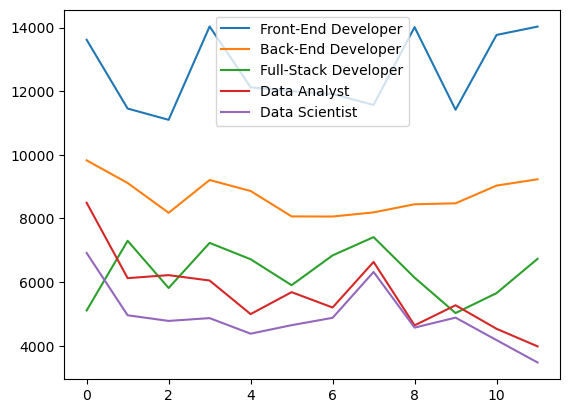

In [28]:
# Plotting the chart
#df_US_merged is the pivot table to be plotted
# top_5 is the filter

df_US_merged[top_5].plot(kind='line') 

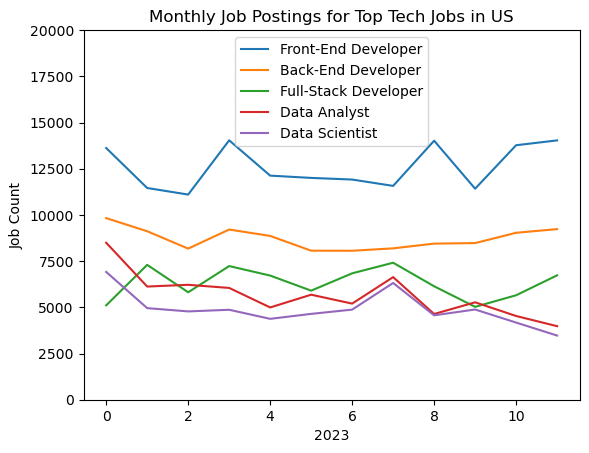

In [31]:
# Cleaning up our chart with labeling and other formatting

df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in US')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.ylim(0, 20000) # Adjusting the y axis range for lower lines, thereby avoiding overlap with the legend
plt.legend()
plt.show() 